# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
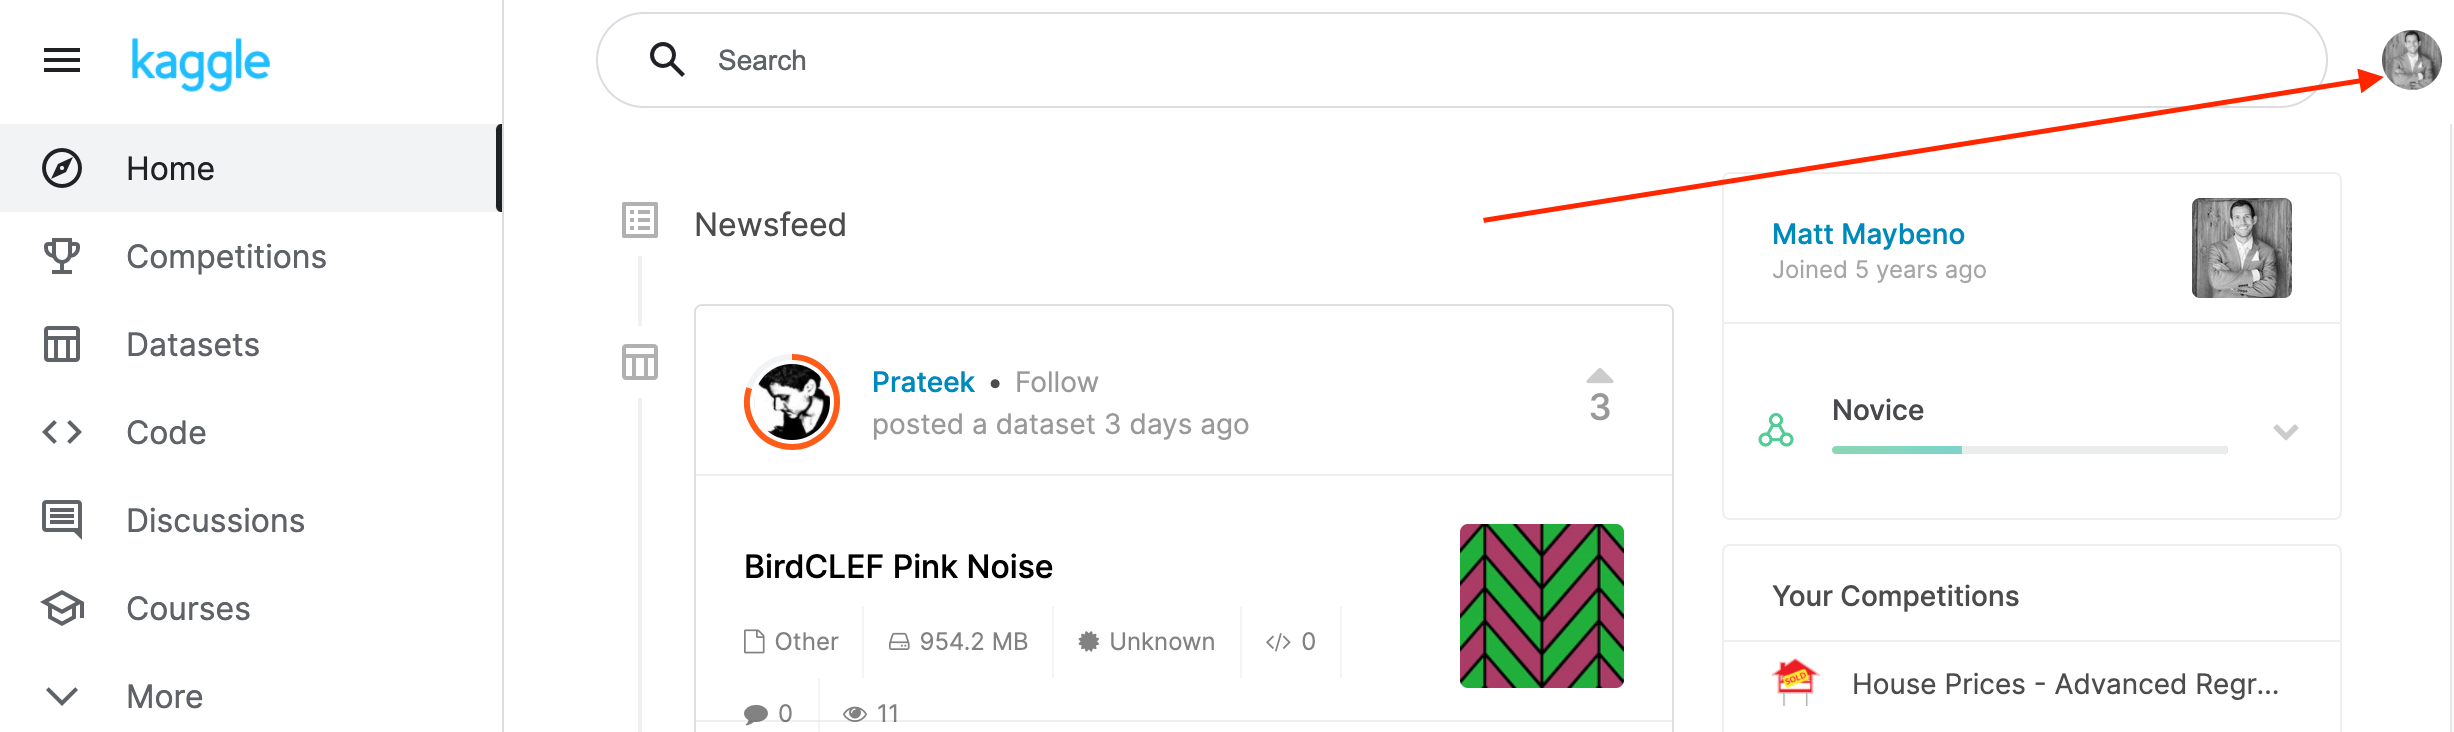
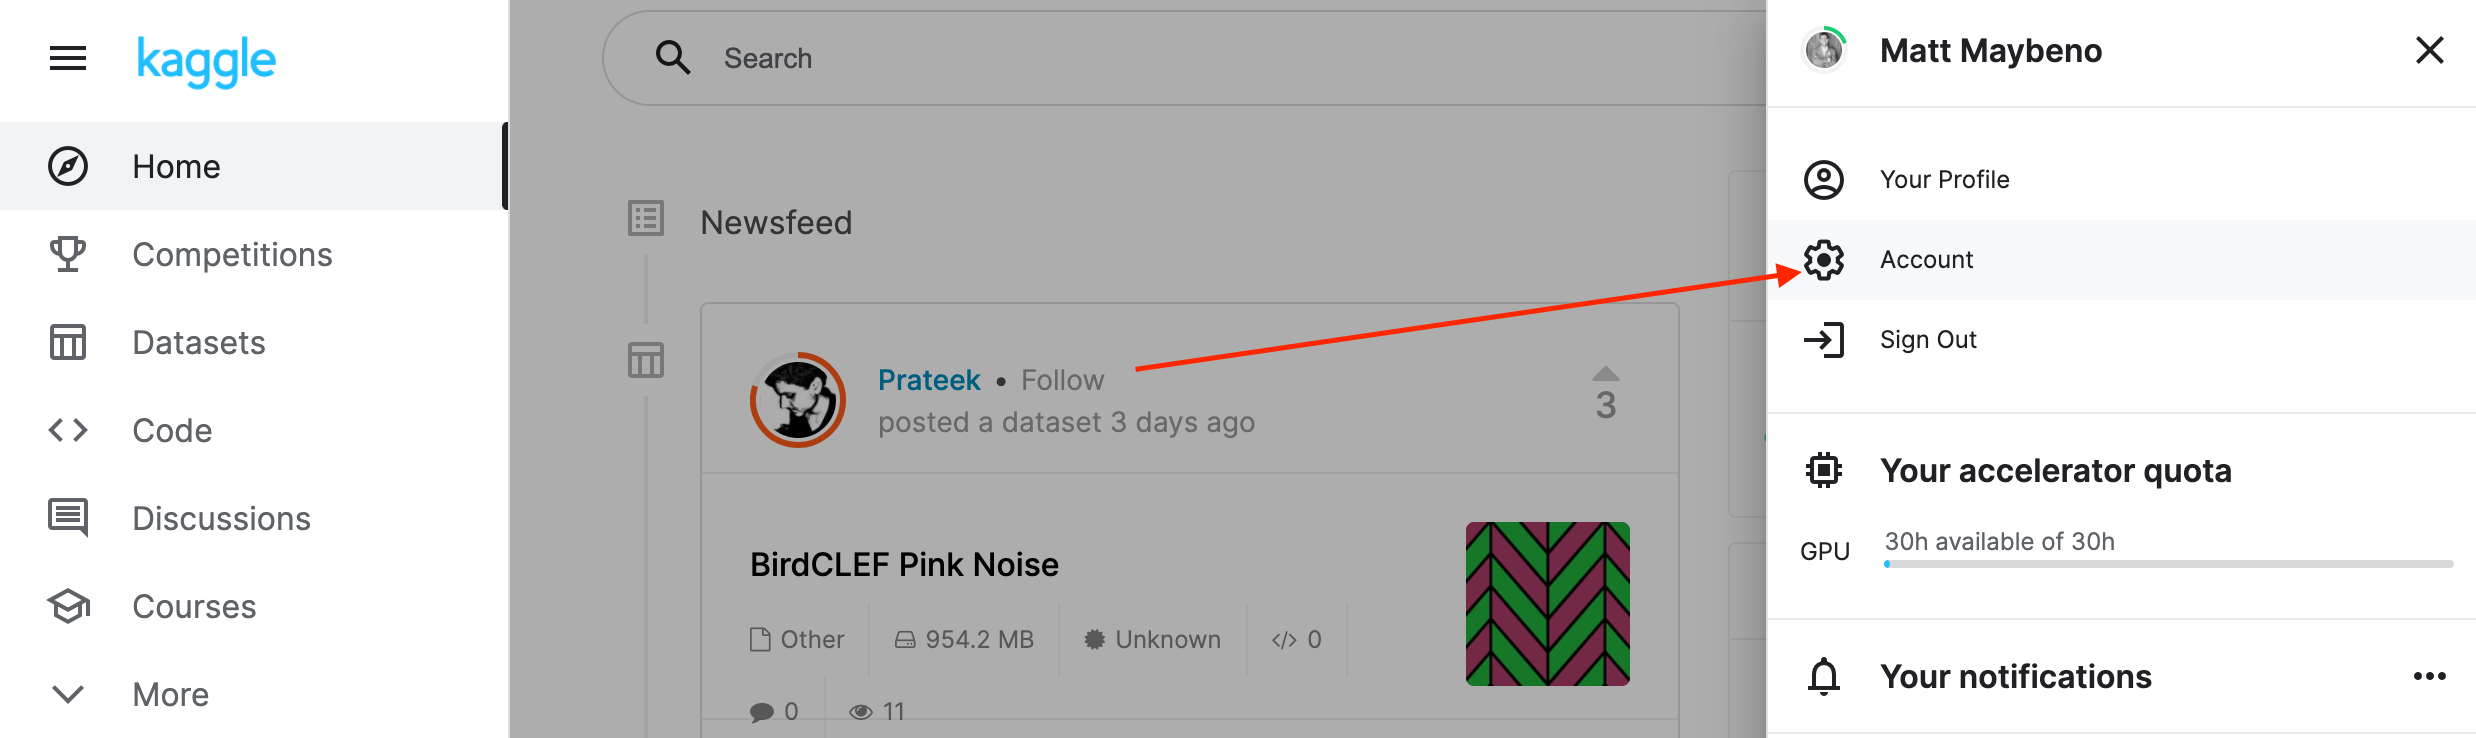
2. Scroll down to API and click Create New API Token.
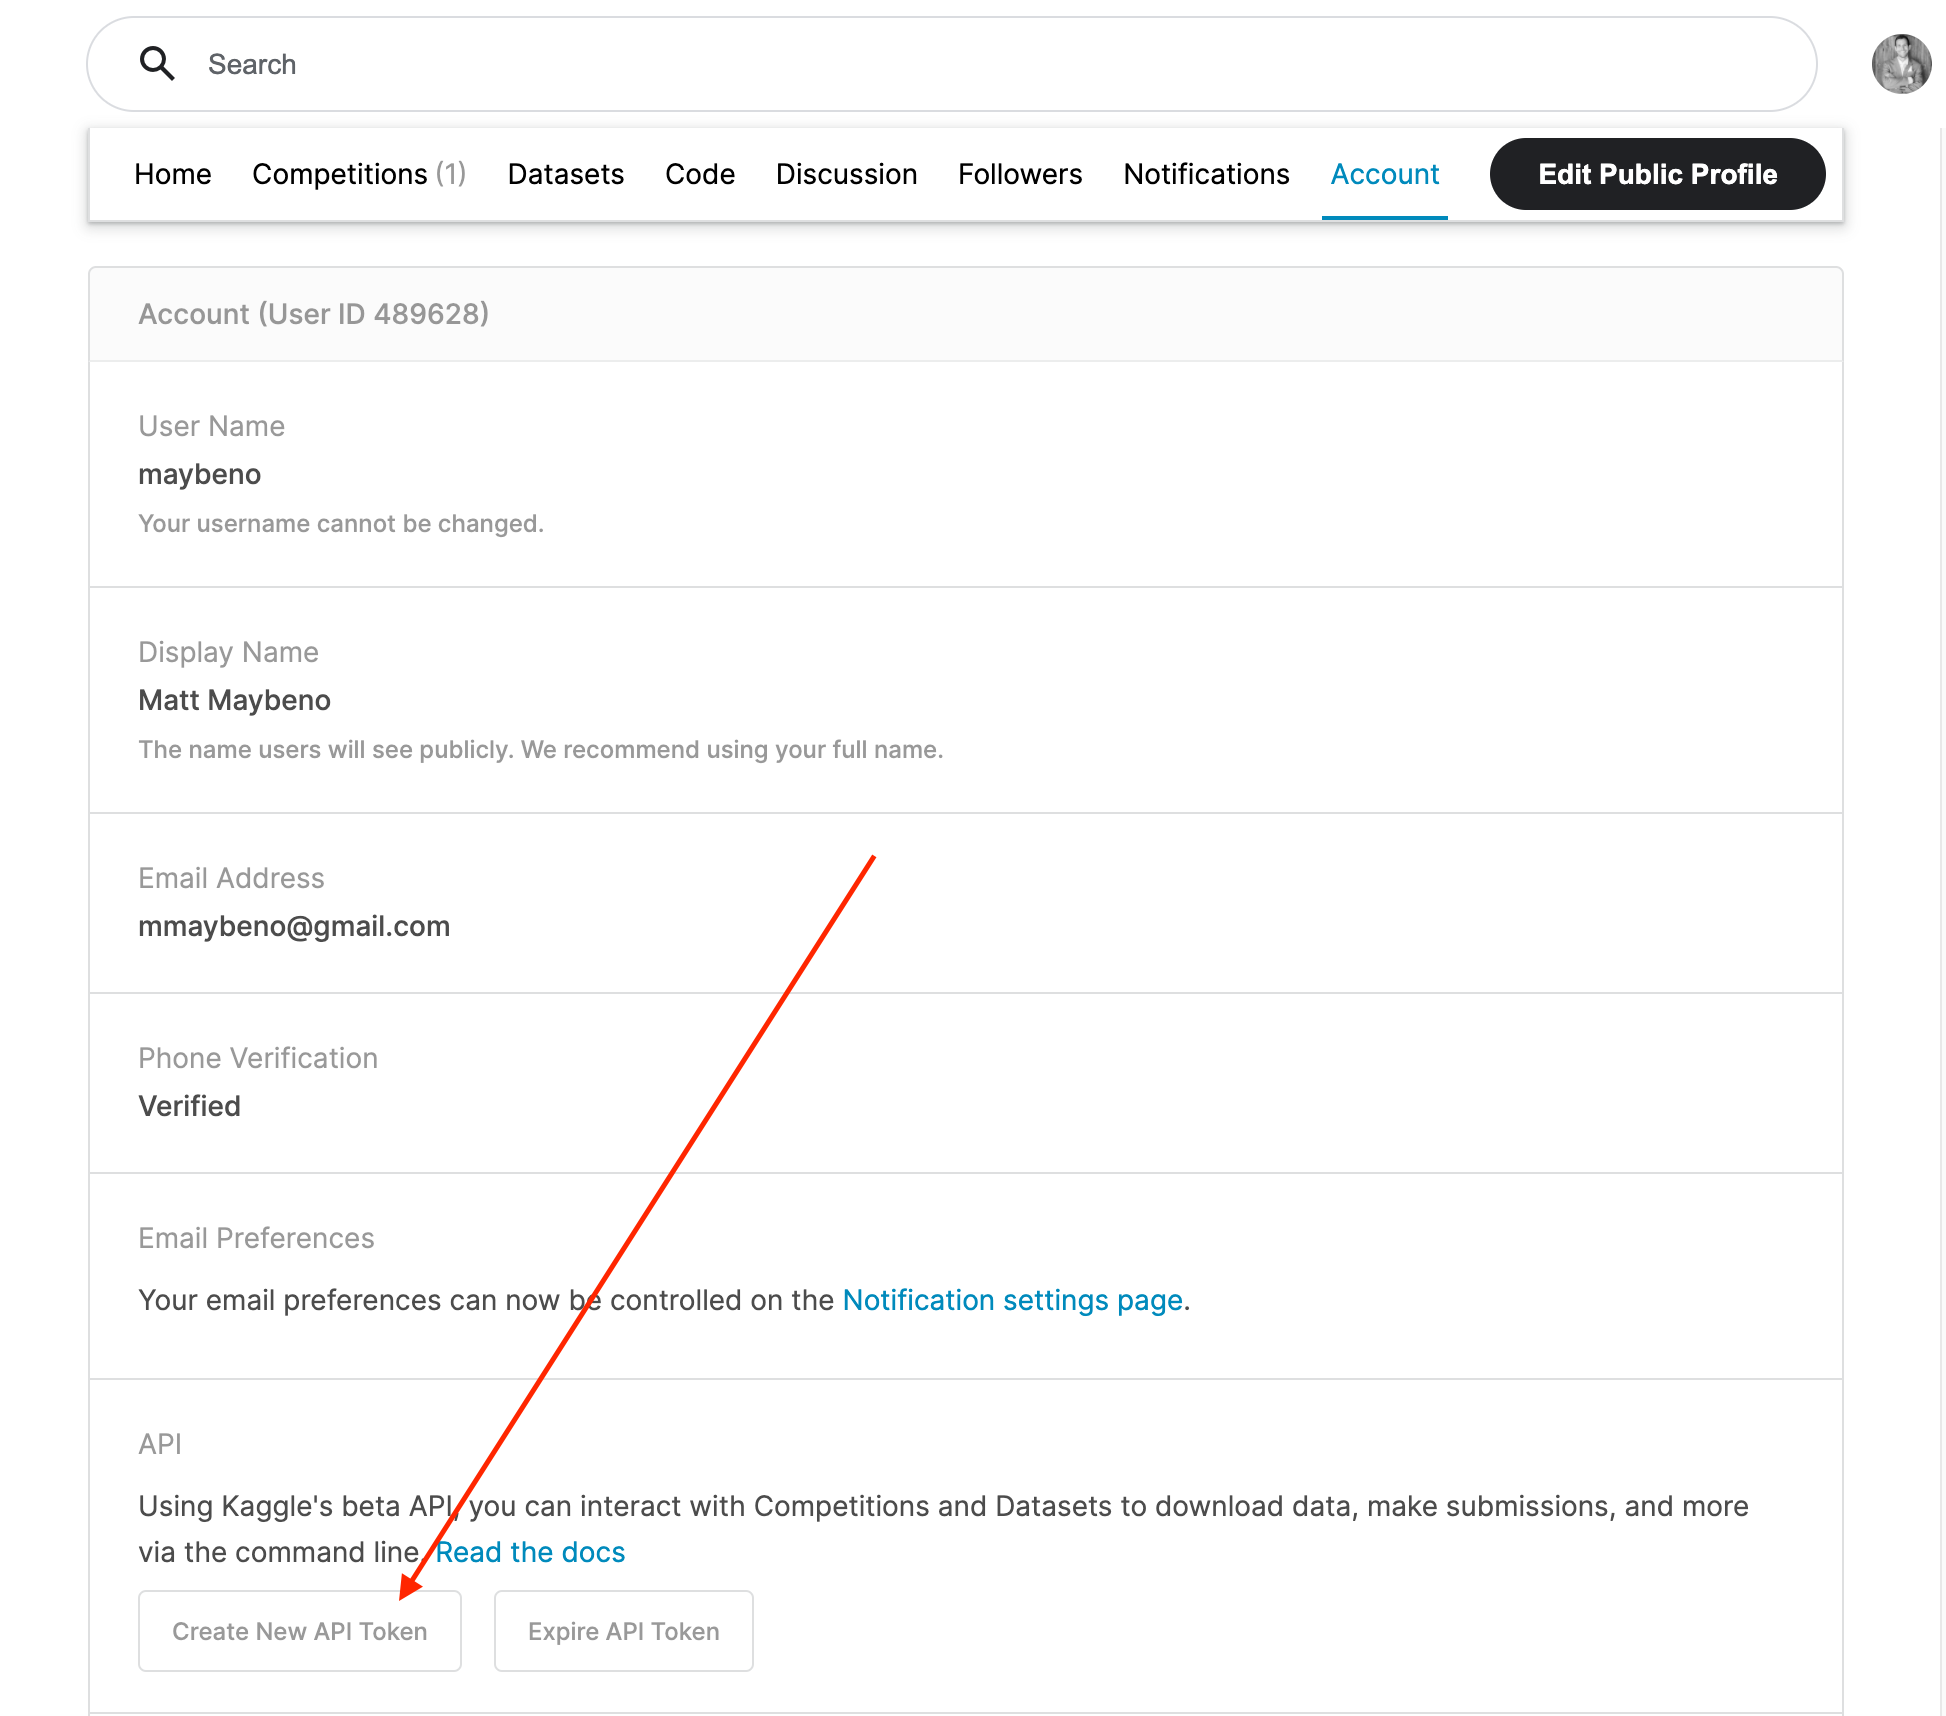
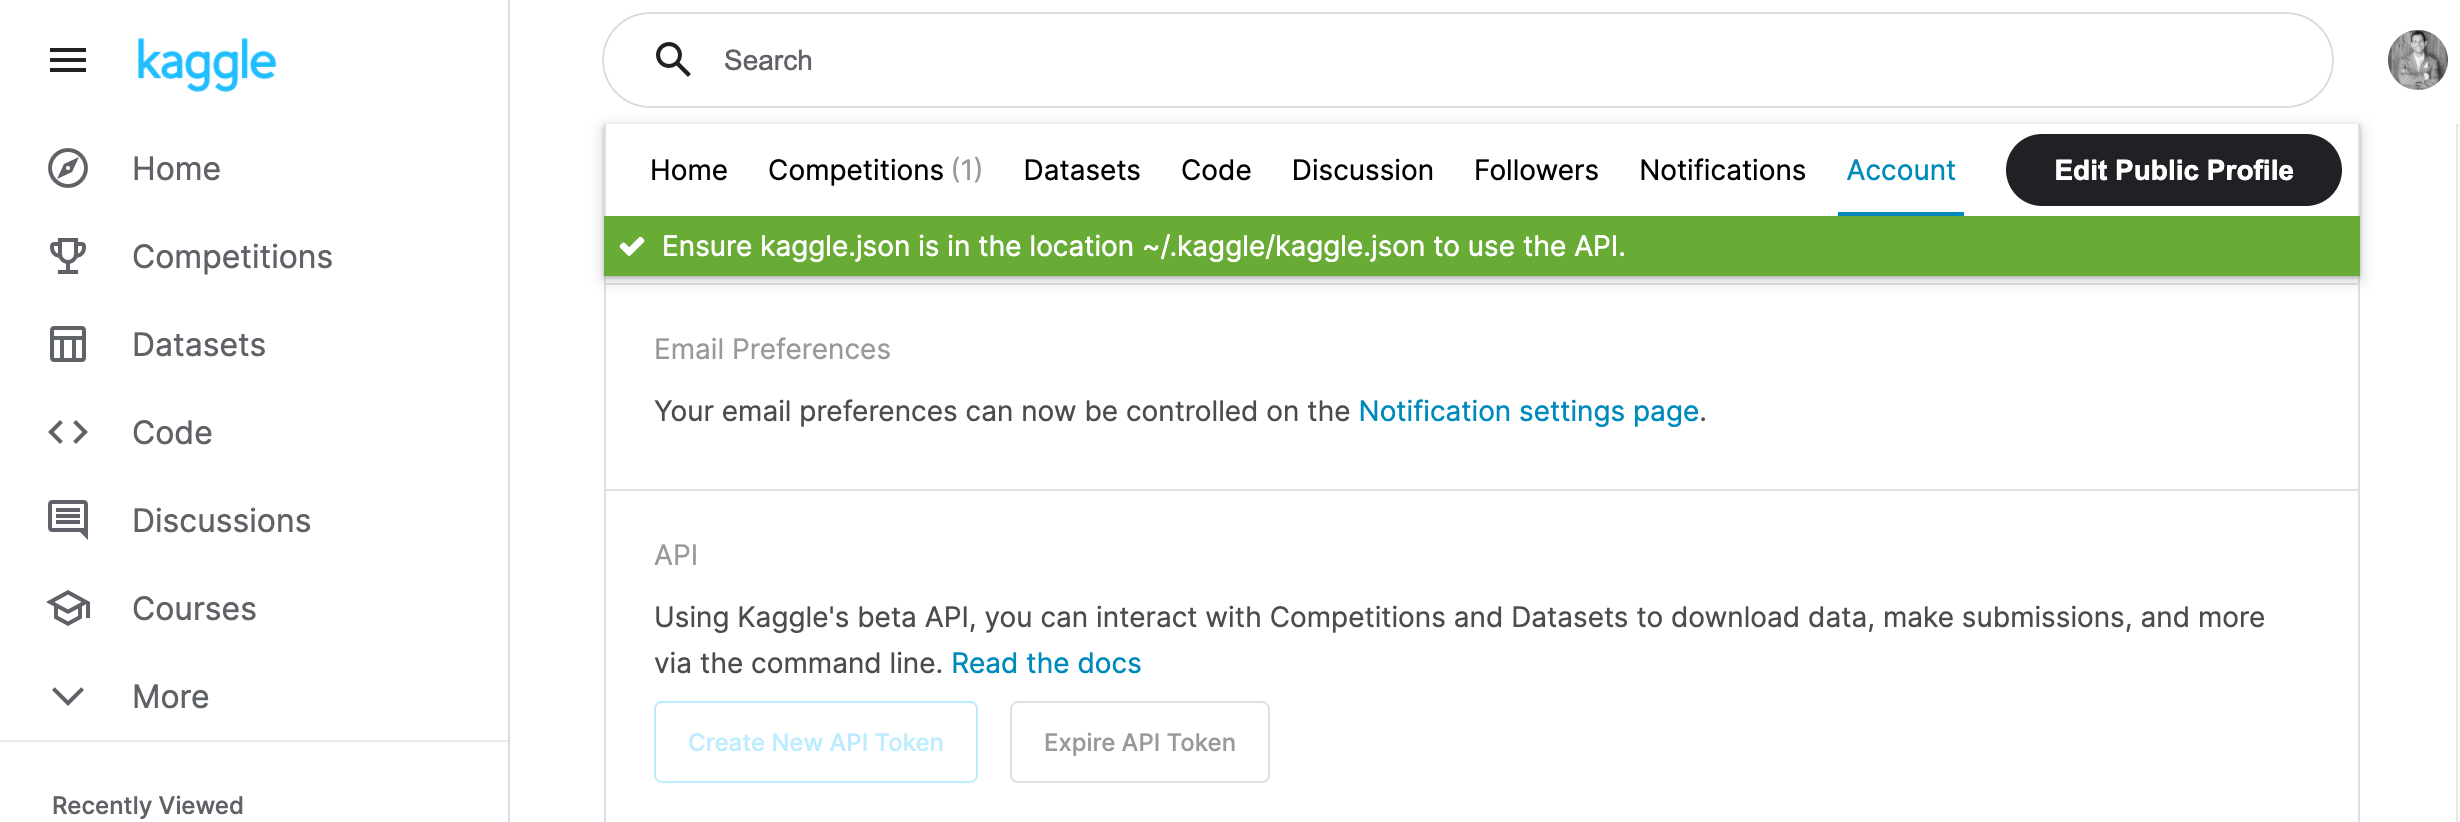
3. Open up `kaggle.json` and use the username and key.
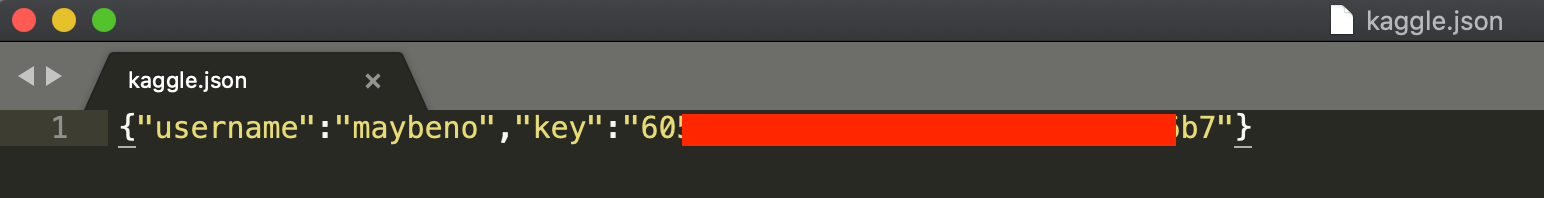

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install torch==2.1.2 torchvision==0.16.2 --index-url https://download.pytorch.org/whl/cpu
!apt-get update; apt-get install -y graphviz graphviz-dev
!pip install autogluon kaggle pygraphviz dask[dataframe]

Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached https://download.pytorch.org/whl/cpu/torch-2.1.2%2Bcpu-cp310-cp310-linux_x86_64.whl (184.9 MB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.16.2%2Bcpu-cp310-cp310-linux_x86_64.whl (1.5 MB)
  Using cached https://download.pytorch.org/whl/networkx-3.2.1-py3-none-any.whl (1.6 MB)
Get:1 http://archive.ubuntu.com/ubuntu jammy InRelease [270 kB]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1756 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2265 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1077 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "abubakarabubakar"
kaggle_key = "b3dc2e23c91efaa813787bc38e4803f4"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
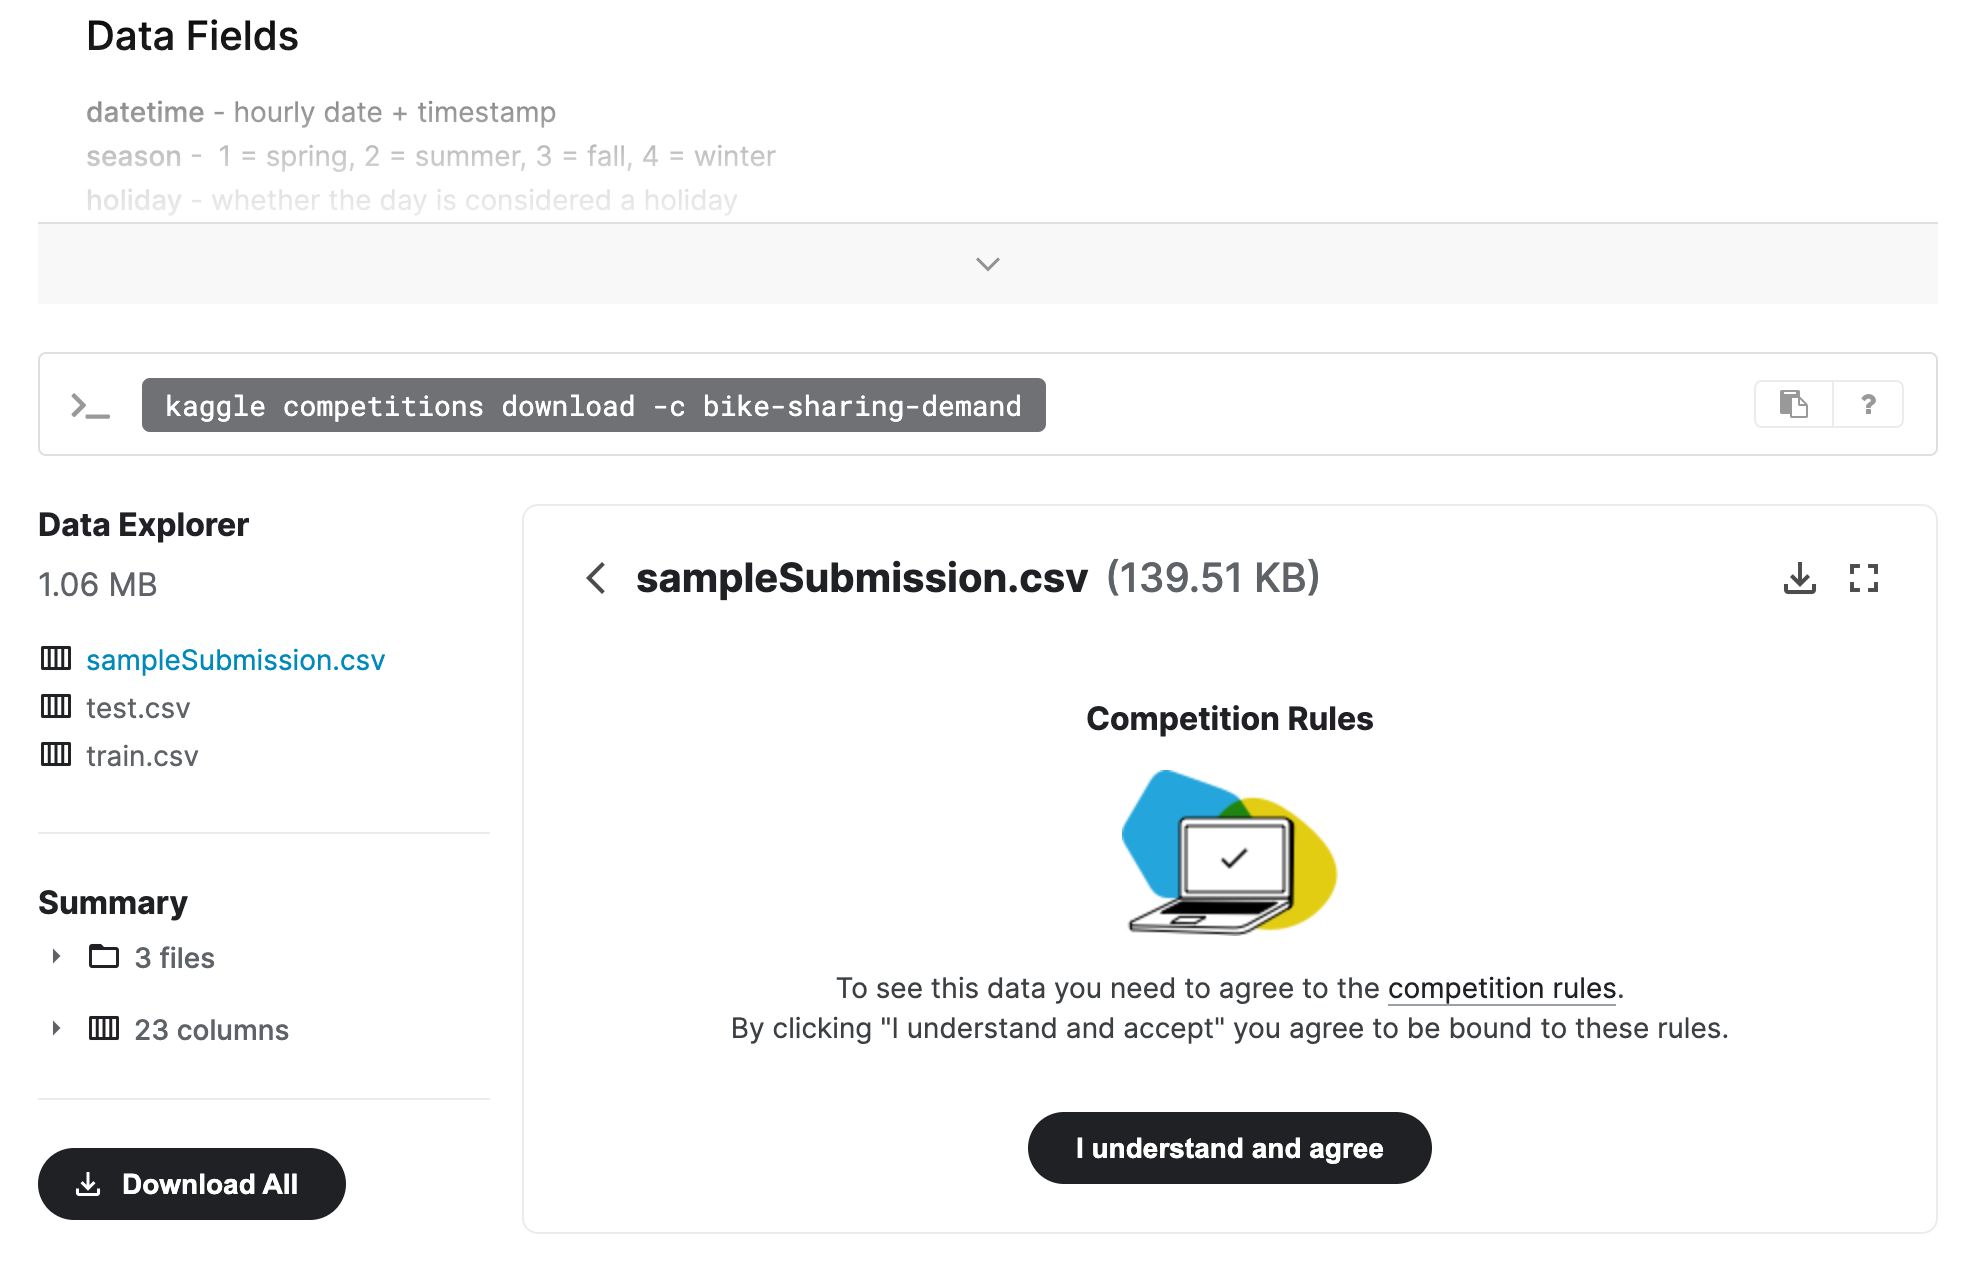

In [9]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [10]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [11]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates = True)
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [12]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [13]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates = True)
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [14]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv", parse_dates = True)
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [11]:
ignore_columns = ["casual", "registered"]


In [12]:
predictor = TabularPredictor(label = "count",eval_metric = "root_mean_squared_error", 
                             learner_kwargs = {"ignored_columns": ignore_columns}).fit(train, time_limit=600,
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240430_120124"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240430_120124/ds_sub_fit/sub_fit_ho.
2024-04-30 12:01:24,810	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.

### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.126572  root_mean_squared_error      21.491584  368.646480                0.000702           0.065879            3       True         12
1   RandomForestMSE_BAG_L2  -53.472880  root_mean_squared_error      16.893597  280.139393                1.065723          33.275077            2       True         11
2          LightGBM_BAG_L2  -55.065551  root_mean_squared_error      16.136937  272.408843                0.309063          25.544527            2       True         10
3        LightGBMXT_BAG_L2  -60.248438  root_mean_squared_error      20.116096  309.760997                4.288222          62.896681            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.087250    0.052067   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.86528199338343,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble

### Create predictions from test dataset

In [14]:
predictions = predictor.predict(test)
predictions.head()

0    23.539440
1    42.445038
2    46.412205
3    49.106556
4    51.761826
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [15]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.576599
std        90.068306
min         2.836576
25%        19.730824
50%        64.044098
75%       168.149567
max       368.032227
Name: count, dtype: float64

In [16]:
if (predictions < 0).any():
    print("The Series contains negative values.")
else:
    print("The Series does not contain negative values.")

The Series does not contain negative values.


In [17]:
# How many negative values do we have?
"The Series does not contain negative values."

'The Series does not contain negative values.'

In [18]:
# Set them to zero
"The Series does not contain negative values."

'The Series does not contain negative values.'

### Set predictions to submission dataframe, save, and submit

In [19]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [20]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 743kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [21]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2024-04-30 12:12:39  first raw submission  complete  1.80616      1.80616       
submission.csv  2024-04-29 21:27:13  first raw submission  complete  1.80617      1.80617       


#### Initial score of 1.80617

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

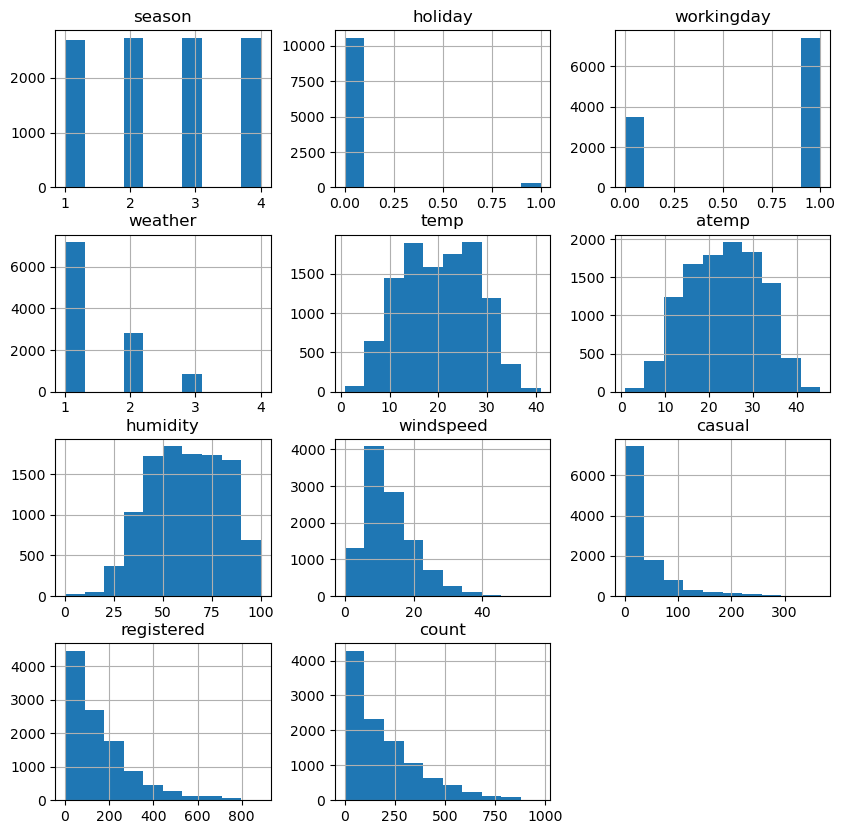

In [22]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize = (10,10))

In [15]:
# create a new feature
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
test['datetime'] = pd.to_datetime(test['datetime'])
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [16]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [25]:
# View are new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  
0        81        0.0       3          13     16  2011      1    1     0  
1        80        0.0       8          32     40  2011      1    1     1  
2        80        0.0       5          27     32  2011      1    1     2  
3        75        0.0       3          10     13  2011      1    1     3  
4        75        0.0       0           1      1  2011      1    1     4

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

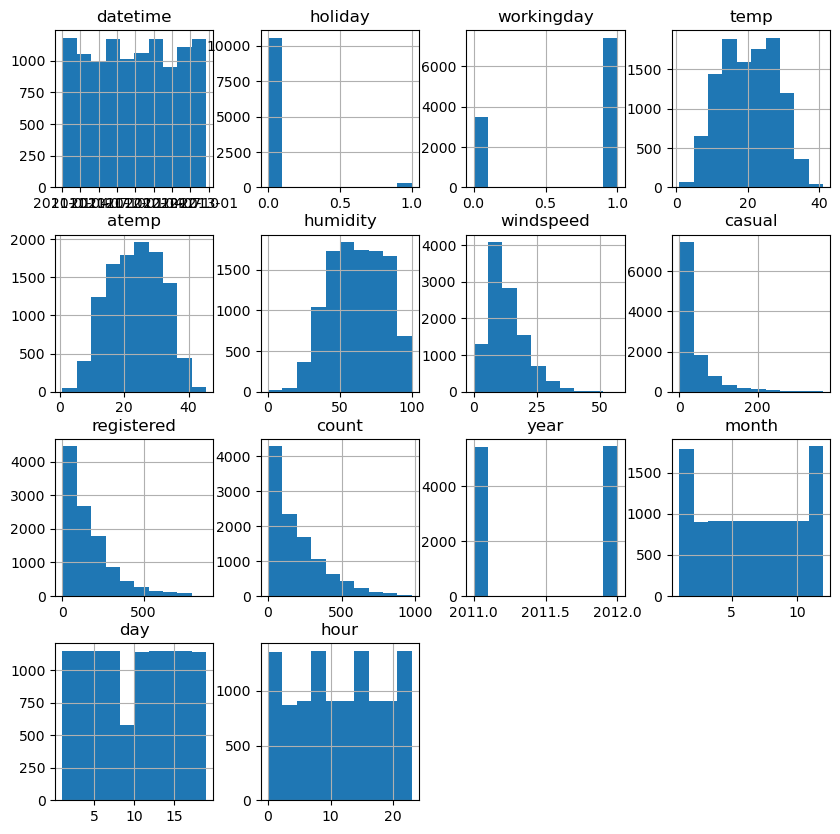

In [26]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(10,10))

## Step 5: Rerun the model with the same settings as before, just with more features

In [27]:
predictor_new_features = TabularPredictor(label = "count",eval_metric = "root_mean_squared_error", 
                             learner_kwargs = {"ignored_columns": ignore_columns}).fit(train, time_limit=600,
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240430_121247"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240430_121247/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 198 seconds

In [28]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.353867  root_mean_squared_error      25.945842  361.508742                0.000889           0.036304            3       True         11
1          LightGBM_BAG_L2  -30.645728  root_mean_squared_error      23.524095  274.549995                0.350482          26.226617            2       True          9
2        LightGBMXT_BAG_L2  -31.103545  root_mean_squared_error      24.735461  291.104553                1.561848          42.781174            2       True          8
3   RandomForestMSE_BAG_L2  -31.709403  root_mean_squared_error      24.032622  292.464647                0.859010          44.141268            2       True         10
4      WeightedEnsemble_L2  -32.358808  root_mean_squared_error      23.122495  248.340082   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.453884062670745,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -38.424983594881716,
  'CatBoost_BAG_L1': -36.13316390838763,
  'WeightedEnsemble_L2': -32.3588084636782,
  'LightGBMXT_BAG_L2': -31.103545469922622,
  'LightGBM_BAG_L2': -30.645727

In [29]:
# Remember to set all negative values to zero
new_predictions = predictor_new_features.predict(test)

In [30]:
new_predictions.head()

0    16.193115
1     9.522911
2     8.850532
3     7.487122
4     6.320376
Name: count, dtype: float32

In [31]:
new_predictions.describe()

count    6493.000000
mean      163.311310
std       146.270386
min         2.075771
25%        48.439312
50%       125.180824
75%       232.707001
max       811.869934
Name: count, dtype: float64

In [32]:
# Check if there is any negative value in the Series
if (new_predictions < 0).any():
    print("The Series contains negative values.")
else:
    print("The Series does not contain negative values.")

The Series does not contain negative values.


In [29]:
datetime = test['datetime']

In [44]:
# Same submitting predictions
submission_new_features = pd.DataFrame({'datetime':datetime,'count':new_predictions}, columns = ['datetime','count'])
#submission_new_features["count"] = new_predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [45]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 724kB/s]
Successfully submitted to Bike Sharing Demand

In [46]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2024-04-30 12:59:32  new features          complete  0.6157       0.6157        
submission_new_features.csv  2024-04-30 12:40:14  new features          error                                
submission_new_features.csv  2024-04-30 12:39:13  new features          error                                
submission.csv               2024-04-30 12:12:39  first raw submission  complete  1.80616      1.80616       


#### New Score of `?`
0.6157

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [49]:
from autogluon.common import space

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'NN_TORCH': {},
                   'GBM': gbm_options,
	'CAT': {'depth': space.Int(lower=4, upper=7, default=6)},
	'XGB': {},
	'FASTAI': {},
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}}, {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}],}
                   #'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                    # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 10*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}  # Refer to TabularPredictor.fit docstring for all valid values


In [53]:
predictor_new_hpo = TabularPredictor(label='count', eval_metric='root_mean_squared_error', 
                                     learner_kwargs = {"ignored_columns": ignore_columns}).fit(
    train,
    time_limit=time_limit,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240430_132132"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240430_132132"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.6
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024


  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: LightGBM/T1 ...
	-40.5225	 = Validation score   (-root_mean_squared_error)
	0.63s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-40.1845	 = Validation score   (-root_mean_squared_error)
	0.72s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-38.9741	 = Validation score   (-root_mean_squared_error)
	0.81s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-121.6438	 = Validation score   (-root_mean_squared_error)
	0.63s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-43.059	 = Validation score   (-root_mean_squared_error)
	0.61s	 = Training   runtime
	0.02s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE ... Tuning model for up to 59.92s of the 594.69s of remaining time.
	No hyperparameter search space specified for RandomForestMSE. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: R

  0%|          | 0/5 [00:00<?, ?it/s]

	Ran out of time, early stopping on iteration 4107.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost/T1 ...
	-36.7991	 = Validation score   (-root_mean_squared_error)
	54.89s	 = Training   runtime
	0.04s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE ... Tuning model for up to 59.92s of the 520.56s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE ...
	-39.2712	 = Validation score   (-root_mean_squared_error)
	5.9s	 = Training   runtime
	0.53s	 = Validation runtime
Hyperparameter tuning model: NeuralNetFastAI ... Tuning model for up to 59.92s of the 511.92s of remaining time.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2237, in _train_single_full
    hpo_models, hpo_results = model.hyperparameter_tune(
  File "/opt/conda/lib/python3.10/si

  0%|          | 0/5 [00:00<?, ?it/s]

	Stopping HPO to satisfy time limit...
Fitted model: XGBoost/T1 ...
	-37.7058	 = Validation score   (-root_mean_squared_error)
	3.3s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	-36.6782	 = Validation score   (-root_mean_squared_error)
	4.63s	 = Training   runtime
	0.23s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	-36.8159	 = Validation score   (-root_mean_squared_error)
	23.22s	 = Training   runtime
	3.69s	 = Validation runtime
Fitted model: XGBoost/T4 ...
	-41.0093	 = Validation score   (-root_mean_squared_error)
	19.44s	 = Training   runtime
	1.68s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch ... Tuning model for up to 59.92s of the 453.4s of remaining time.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2237, in _train_single_full
    hpo_models, hpo_results = model.hyperparameter_tune(
  File "/opt/conda/lib/python3.10/site-packages

In [54]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -34.869666  root_mean_squared_error       6.391285  118.907295                0.000630           0.030676            2       True         15
1            XGBoost/T2  -36.678187  root_mean_squared_error       0.228805    4.632776                0.228805           4.632776            1       True         12
2           CatBoost/T1  -36.799132  root_mean_squared_error       0.035260   54.888279                0.035260          54.888279            1       True          9
3            XGBoost/T3  -36.815868  root_mean_squared_error       3.690115   23.215432                3.690115          23.215432            1       True         13
4            XGBoost/T1  -37.705801  root_mean_squared_error       0.089698    3.300783                0.089

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBM/T1': 'LGBModel',
  'LightGBM/T2': 'LGBModel',
  'LightGBM/T3': 'LGBModel',
  'LightGBM/T4': 'LGBModel',
  'LightGBM/T5': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost/T1': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'XGBoost/T1': 'XGBoostModel',
  'XGBoost/T2': 'XGBoostModel',
  'XGBoost/T3': 'XGBoostModel',
  'XGBoost/T4': 'XGBoostModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -112.76989371124893,
  'KNeighborsDist': -94.48812854475563,
  'LightGBM/T1': -40.5225490118602,
  'LightGBM/T2': -40.18451156136566,
  'LightGBM/T3': -38.97413759023056,
  'LightGBM/T4': -121.64383490230475,
  'LightGBM/T5': -43.059042560762286,
  'RandomForestMSE': -40.11847077365818,
  'CatBoost/T1': -36.79913165195156,
  'ExtraTreesMSE': -39.27121049182882,
  'XGBoost/T1': -37.705801066923854,
  'XGBoost/T2': -36.67818749509083,
  'XGBoost/T3': -36.815

In [55]:
predictions_hpo = predictor_new_hpo.predict(test)

In [56]:
# Remember to set all negative values to zero
# Check if there is any negative value in the Series
if (predictions_hpo < 0).any():
    print("The Series contains negative values.")
else:
    print("The Series does not contain negative values.")

The Series contains negative values.


In [58]:
predictions_hpo[predictions_hpo < 0] = 0

In [59]:
if (predictions_hpo < 0).any():
    print("The Series contains negative values.")
else:
    print("The Series does not contain negative values.")

The Series does not contain negative values.


In [60]:
predictions_hpo.head()

0    18.542929
1     6.336639
2     4.183712
3     2.869098
4     3.182961
Name: count, dtype: float32

In [61]:
# Same submitting predictions
submission_new_hpo = pd.DataFrame({'datetime':datetime,'count':predictions_hpo}, columns = ['datetime','count'])
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [62]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 574kB/s]
Successfully submitted to Bike Sharing Demand

In [63]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-04-30 13:30:18  new features with hyperparameters  complete  0.58551      0.58551       
submission_new_features.csv  2024-04-30 12:59:32  new features                       complete  0.6157       0.6157        
submission_new_features.csv  2024-04-30 12:40:14  new features                       error                                
submission_new_features.csv  2024-04-30 12:39:13  new features                       error                                


#### New Score of  0.58551

In [17]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error' 
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 600 seconds
presets = "optimize_for_deployment"       

In [21]:
import autogluon.core as ag
from autogluon.common import space
## From autogluon documentation

# Exclude ['NN_TORCH'] family of models
excluded_model_types = ['NN_TORCH']


# Considering GBM, XT, XGB, KNN and RF model types (as these along with WeightedEnsembles have shown good results in the past)
# For GBM
gbm_options = [{'extra_trees': True, 
                'num_boost_round': space.Int(lower=100, upper=800, default=100),
                'num_leaves': space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']
# XT Models
xt_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}
# XGB Models
xgb_options = [{'objective': 'reg:squarederror', # 'reg:linear' is deprecated
                'eval_metric': 'rmse', 
                'max_depth': space.Int(lower=5, upper=8, default=6), 
                'n_estimators': space.Int(lower=100, upper=500, default=100), 
                'eta':.3, 
                'subsample': 1,
                'colsample_bytree': 1}]
# Random Forest Models
rf_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}
# KNN
knn_options = [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Uniform'}}, 
               {'weights': 'distance', 'ag_args': {'name_suffix': 'Distance'}}]  # default

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'KNN': knn_options,
                   'XT': xt_options,
                   'XGB': xgb_options,
                   'RF': rf_options
                  }  


num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = { 
                            'num_trials': num_trials,
                            'scheduler' : scheduler,
                            'searcher': search_strategy,
                        }


predictor_new_hpo2 = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train, 
                                                                         time_limit=time_limit,
                                                                         presets=presets, 
                                                                         hyperparameters=hyperparameters, 
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         excluded_model_types=excluded_model_types,
                                                                         refit_full='best')

No path specified. Models will be saved in: "AutogluonModels/ag-20240501_215500"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240501_215500"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.6
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
CPU Count:          2
Memory Avail:       2.68 GB / 3.78 GB (70.8%)
Disk Space Avail:   8589934582.46 GB / 8589934592.00 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 15
Label Column:       count
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2741.21 MB
	Train Data (Original)  Memory Usage: 0.77 MB (0.0% of available memo

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: LightGBMXT/T1 ...
	-78.818	 = Validation score   (-root_mean_squared_error)
	2.12s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: LightGBMXT/T2 ...
	-42.1715	 = Validation score   (-root_mean_squared_error)
	1.04s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBMXT/T3 ...
	-86.8568	 = Validation score   (-root_mean_squared_error)
	0.68s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: LightGBMXT/T4 ...
	-50.734	 = Validation score   (-root_mean_squared_error)
	2.37s	 = Training   runtime
	0.28s	 = Validation runtime
Fitted model: LightGBMXT/T5 ...
	-89.232	 = Validation score   (-root_mean_squared_error)
	0.47s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBMXT/T6 ...
	-58.2782	 = Validation score   (-root_mean_squared_error)
	1.04s	 = Training   runtime
	0.12s	 = Validation runtime
Fitted model: LightGBMXT/T7 ...
	-38.6735	 = Validation score   (-root_mean_squared_error)
	1.78s	 = Training

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 36.7309
[1000]	valid_set's rmse: 36.6478
[1000]	valid_set's rmse: 37.9359
[2000]	valid_set's rmse: 36.5501
[3000]	valid_set's rmse: 36.1871
[4000]	valid_set's rmse: 36.0677
[5000]	valid_set's rmse: 36.0518
[6000]	valid_set's rmse: 36.0917
[1000]	valid_set's rmse: 35.5297
[1000]	valid_set's rmse: 36.5371
[2000]	valid_set's rmse: 35.9143
[1000]	valid_set's rmse: 36.3063
[2000]	valid_set's rmse: 35.902


	Ran out of time, early stopping on iteration 673. Best iteration is:
	[673]	valid_set's rmse: 38.6813
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	-36.5883	 = Validation score   (-root_mean_squared_error)
	2.83s	 = Training   runtime
	0.35s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-35.5328	 = Validation score   (-root_mean_squared_error)
	1.61s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-36.5418	 = Validation score   (-root_mean_squared_error)
	2.38s	 = Training   runtime
	0.3s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-36.0477	 = Validation score   (-root_mean_squared_error)
	14.52s	 = Training   runtime
	2.29s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-36.3146	 = Validation score   (-root_mean_squared_error)
	2.39s	 = Training   runtime
	0.29s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-35.5162	 = Validation score   (-root_mean_squared_error)
	4.57s	 = Training   runtime
	0.62

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: XGBoost/T1 ...
	-40.3546	 = Validation score   (-root_mean_squared_error)
	0.67s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	-38.7836	 = Validation score   (-root_mean_squared_error)
	1.45s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	-36.7801	 = Validation score   (-root_mean_squared_error)
	1.52s	 = Training   runtime
	0.08s	 = Validation runtime
Fitted model: XGBoost/T4 ...
	-42.4208	 = Validation score   (-root_mean_squared_error)
	0.56s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: XGBoost/T5 ...
	-42.3094	 = Validation score   (-root_mean_squared_error)
	1.81s	 = Training   runtime
	0.11s	 = Validation runtime
Fitted model: XGBoost/T6 ...
	-37.9807	 = Validation score   (-root_mean_squared_error)
	1.33s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: XGBoost/T7 ...
	-40.5047	 = Validation score   (-root_mean_squared_error)
	0.81s	 = Training   runtime
	0.04s	

In [22]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -34.267188  root_mean_squared_error       2.757617  33.615876                0.000609           0.027013            2       True          8
1        LightGBMLarge -34.877774  root_mean_squared_error       0.306005   3.736542                0.306005           3.736542            1       True          7
2          LightGBM/T6 -35.516199  root_mean_squared_error       0.624388   4.568620                0.624388           4.568620            1       True          3
3          LightGBM/T2 -35.532811  root_mean_squared_error       0.061587   1.614235                0.061587           1.614235            1       True          2
4          LightGBM/T9 -35.893391  root_mean_squared_error       0.972525   8.146929                0.972525           8.14

{'model_types': {'KNeighborsDistance': 'KNNModel',
  'LightGBM/T2': 'LGBModel',
  'LightGBM/T6': 'LGBModel',
  'LightGBM/T9': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'XGBoost/T10': 'XGBoostModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsDistance': -94.48812854475563,
  'LightGBM/T2': -35.532811026722946,
  'LightGBM/T6': -35.51619931582938,
  'LightGBM/T9': -35.893390786419374,
  'RandomForestMSE': -40.11847077365818,
  'XGBoost/T10': -36.28218528200975,
  'LightGBMLarge': -34.877773655726564,
  'WeightedEnsemble_L2': -34.26718794316021},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsDistance': ['KNeighborsDistance'],
  'LightGBM/T2': ['LightGBM', 'T2'],
  'LightGBM/T6': ['LightGBM', 'T6'],
  'LightGBM/T9': ['LightGBM', 'T9'],
  'RandomForestMSE': ['RandomForestMSE'],
  'XGBoost/T10': ['XGBoost', 'T10'],
  'LightGBMLarge': ['LightGBMLarge'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_

In [24]:
predictions_hpo2 = predictor_new_hpo2.predict(test)

In [25]:
# Remember to set all negative values to zero
# Check if there is any negative value in the Series
if (predictions_hpo2 < 0).any():
    print("The Series contains negative values.")
else:
    print("The Series does not contain negative values.")

The Series contains negative values.


In [27]:
predictions_hpo2[predictions_hpo2 < 0] = 0

In [30]:
# Same submitting predictions
submission_new_hpo = pd.DataFrame({'datetime':datetime,'count':predictions_hpo2}, columns = ['datetime','count'])
submission_new_hpo.to_csv("submission_new_hpo2.csv", index=False)

In [32]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo2.csv -m "new features with hyperparameters2"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 670kB/s]
Successfully submitted to Bike Sharing Demand

In [33]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                         status    publicScore  privateScore  
---------------------------  -------------------  ----------------------------------  --------  -----------  ------------  
submission_new_hpo2.csv      2024-05-01 22:02:42  new features with hyperparameters2  complete  0.56076      0.56076       
submission_new_hpo.csv       2024-05-01 22:01:34  new features with hyperparameters   complete  0.58551      0.58551       
submission_new_hpo.csv       2024-04-30 13:30:18  new features with hyperparameters   complete  0.58551      0.58551       
submission_new_features.csv  2024-04-30 12:59:32  new features                        complete  0.6157       0.6157        


#### New Score of 0.56076

In [34]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error' 
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 600 seconds
presets = "optimize_for_deployment"          # Lighter preset options (faster)

import autogluon.core as ag
## From autogluon documentation: 

# Exclude ['NN_TORCH'] family of models
excluded_model_types = ['NN_TORCH']


# Considering GBM, XT and XGB model types (as these along with WeightedEnsembles have shown good results)
# For GBM
gbm_options = [{'extra_trees': True, 
                'num_boost_round': space.Int(lower=100, upper=800, default=100),
                'num_leaves': space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

# XT Models
xt_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}

# XGB Models
xgb_options = [{'objective': 'reg:squarederror', # 'reg:linear' is deprecated
                'eval_metric': 'rmse', 
                'max_depth':space.Int(lower=5, upper=8, default=6), 
                'n_estimators': space.Int(lower=100, upper=500, default=100), 
                'eta':.3, 
                'subsample': 1,
                'colsample_bytree': 1}]

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'XT': xt_options,
                   'XGB': xgb_options
                  }  

num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = { 
                            'num_trials': num_trials,
                            'scheduler' : scheduler,
                            'searcher': search_strategy,
                        }

predictor_new_hpo3 = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train, 
                                                                         time_limit=time_limit,
                                                                         presets=presets, 
                                                                         hyperparameters=hyperparameters, 
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         excluded_model_types=excluded_model_types,
                                                                         refit_full='best')

No path specified. Models will be saved in: "AutogluonModels/ag-20240501_220613"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240501_220613"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.6
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
CPU Count:          2
Memory Avail:       2.09 GB / 3.78 GB (55.4%)
Disk Space Avail:   8589934582.46 GB / 8589934592.00 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 15
Label Column:       count
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2143.96 MB
	Train Data (Original)  Memory Usage: 0.77 MB (0.0% of available memo

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: LightGBMXT/T1 ...
	-78.818	 = Validation score   (-root_mean_squared_error)
	0.42s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBMXT/T2 ...
	-42.1715	 = Validation score   (-root_mean_squared_error)
	1.1s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBMXT/T3 ...
	-86.8568	 = Validation score   (-root_mean_squared_error)
	0.6s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBMXT/T4 ...
	-50.734	 = Validation score   (-root_mean_squared_error)
	1.54s	 = Training   runtime
	0.21s	 = Validation runtime
Fitted model: LightGBMXT/T5 ...
	-89.232	 = Validation score   (-root_mean_squared_error)
	0.54s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBMXT/T6 ...
	-58.2782	 = Validation score   (-root_mean_squared_error)
	0.99s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: LightGBMXT/T7 ...
	-38.6735	 = Validation score   (-root_mean_squared_error)
	1.69s	 = Training   

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 36.7309
[1000]	valid_set's rmse: 36.6478
[1000]	valid_set's rmse: 37.9359
[2000]	valid_set's rmse: 36.5501
[3000]	valid_set's rmse: 36.1871
[4000]	valid_set's rmse: 36.0677
[5000]	valid_set's rmse: 36.0518
[6000]	valid_set's rmse: 36.0917
[1000]	valid_set's rmse: 35.5297
[1000]	valid_set's rmse: 36.5371
[2000]	valid_set's rmse: 35.9143
[1000]	valid_set's rmse: 36.3063
[2000]	valid_set's rmse: 35.902
[1000]	valid_set's rmse: 37.3556
[2000]	valid_set's rmse: 36.6394
[3000]	valid_set's rmse: 36.4532
[4000]	valid_set's rmse: 36.4775
[1000]	valid_set's rmse: 36.2236
[1000]	valid_set's rmse: 38.674
[2000]	valid_set's rmse: 37.7712
[3000]	valid_set's rmse: 37.3746
[4000]	valid_set's rmse: 37.1747
[5000]	valid_set's rmse: 37.1228
[6000]	valid_set's rmse: 37.1122
[7000]	valid_set's rmse: 37.1538
[8000]	valid_set's rmse: 37.1722
[1000]	valid_set's rmse: 41.0805
[2000]	valid_set's rmse: 38.5217
[3000]	valid_set's rmse: 37.9189
[4000]	valid_set's rmse: 37.6318
[5000]	valid

	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	-36.5883	 = Validation score   (-root_mean_squared_error)
	2.34s	 = Training   runtime
	0.37s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-35.5328	 = Validation score   (-root_mean_squared_error)
	1.66s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-36.5418	 = Validation score   (-root_mean_squared_error)
	2.41s	 = Training   runtime
	0.38s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-36.0477	 = Validation score   (-root_mean_squared_error)
	15.1s	 = Training   runtime
	1.88s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-36.3146	 = Validation score   (-root_mean_squared_error)
	1.79s	 = Training   runtime
	0.18s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-35.5162	 = Validation score   (-root_mean_squared_error)
	3.45s	 = Training   runtime
	0.49s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	-36.5438	 = Validation score   (-root_mean_squar

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: XGBoost/T1 ...
	-40.3546	 = Validation score   (-root_mean_squared_error)
	0.4s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	-38.7836	 = Validation score   (-root_mean_squared_error)
	1.8s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	-36.7801	 = Validation score   (-root_mean_squared_error)
	1.56s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: XGBoost/T4 ...
	-42.4208	 = Validation score   (-root_mean_squared_error)
	0.59s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: XGBoost/T5 ...
	-42.3094	 = Validation score   (-root_mean_squared_error)
	1.6s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: XGBoost/T6 ...
	-37.9807	 = Validation score   (-root_mean_squared_error)
	1.19s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: XGBoost/T7 ...
	-40.5047	 = Validation score   (-root_mean_squared_error)
	0.86s	 = Training   runtime
	0.04s	 = V

In [35]:
predictor_new_hpo3.fit_summary()


*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -34.328014  root_mean_squared_error       1.768861  16.955682                0.000512           0.020440            2       True          6
1        LightGBMLarge -34.877774  root_mean_squared_error       0.345648   3.426228                0.345648           3.426228            1       True          5
2          LightGBM/T6 -35.516199  root_mean_squared_error       0.492038   3.445713                0.492038           3.445713            1       True          2
3          LightGBM/T2 -35.532811  root_mean_squared_error       0.068099   1.655054                0.068099           1.655054            1       True          1
4          LightGBM/T9 -35.893391  root_mean_squared_error       0.792925   7.046207                0.792925           7.04

{'model_types': {'LightGBM/T2': 'LGBModel',
  'LightGBM/T6': 'LGBModel',
  'LightGBM/T9': 'LGBModel',
  'XGBoost/T10': 'XGBoostModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T2': -35.532811026722946,
  'LightGBM/T6': -35.51619931582938,
  'LightGBM/T9': -35.893390786419374,
  'XGBoost/T10': -36.28218528200975,
  'LightGBMLarge': -34.877773655726564,
  'WeightedEnsemble_L2': -34.32801358937902},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T2': ['LightGBM', 'T2'],
  'LightGBM/T6': ['LightGBM', 'T6'],
  'LightGBM/T9': ['LightGBM', 'T9'],
  'XGBoost/T10': ['XGBoost', 'T10'],
  'LightGBMLarge': ['LightGBMLarge'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T2': 1.6550543308258057,
  'LightGBM/T6': 3.4457128047943115,
  'LightGBM/T9': 7.046207427978516,
  'XGBoost/T10': 1.3620405197143555,
  'LightGBMLarge': 3.426227569580078,
  'WeightedEnsemble_L2': 0.02043

In [36]:
predictions_hpo3 = predictor_new_hpo3.predict(test)


In [37]:
# Remember to set all negative values to zero
# Check if there is any negative value in the Series
if (predictions_hpo3 < 0).any():
    print("The Series contains negative values.")
else:
    print("The Series does not contain negative values.")
predictions_hpo3[predictions_hpo3 < 0] = 0

The Series contains negative values.


In [38]:
# Same submitting predictions
submission_new_hpo = pd.DataFrame({'datetime':datetime,'count':predictions_hpo3}, columns = ['datetime','count'])
submission_new_hpo.to_csv("submission_new_hpo3.csv", index=False)

In [39]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters3"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 692kB/s]
Successfully submitted to Bike Sharing Demand

In [40]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                         status    publicScore  privateScore  
---------------------------  -------------------  ----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-01 22:11:28  new features with hyperparameters3  complete  0.58551      0.58551       
submission_new_hpo2.csv      2024-05-01 22:02:42  new features with hyperparameters2  complete  0.56076      0.56076       
submission_new_hpo.csv       2024-05-01 22:01:34  new features with hyperparameters   complete  0.58551      0.58551       
submission_new_hpo.csv       2024-04-30 13:30:18  new features with hyperparameters   complete  0.58551      0.58551       


### New Score of 0.58551

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

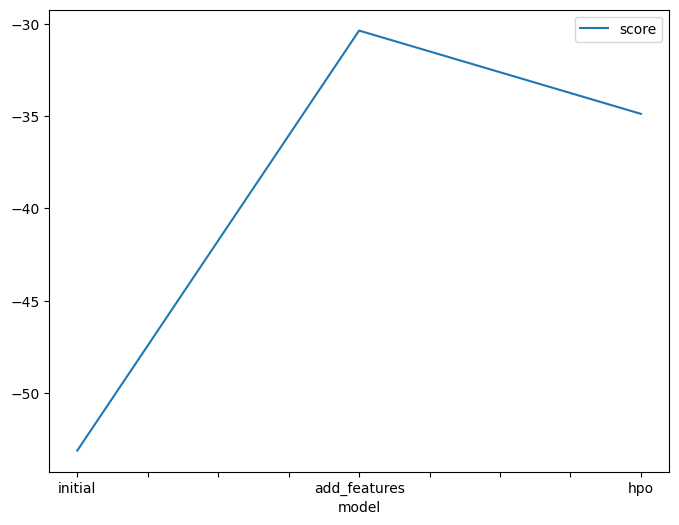

In [2]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.1266, -30.3539, -34.8697]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

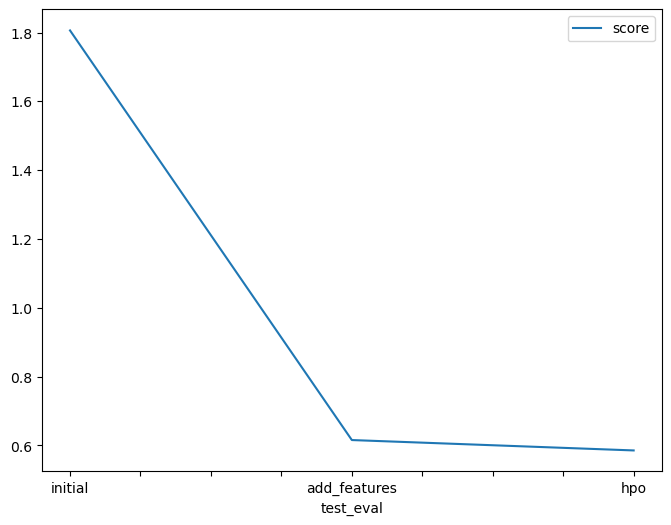

In [64]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80616, 0.61570, 0.58551]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [42]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo "],
    "hpo1": ["prescribed_values", "prescribed_values", "Tree-Based Models: (CAT, RF, XT & KNN)"],
    "hpo2": ["prescribed_values", "prescribed_values", "KNN"],
    "hpo3": ["presets: 'high quality' (auto_stack=True)", "presets: 'high quality' (auto_stack=True)", "presets: 'optimize_for_deployment"],
    "score": [1.80616, 0.61570, 0.58551]
})

model                                    hpo1               hpo2  \
0       initial                       prescribed_values  prescribed_values   
1  add_features                       prescribed_values  prescribed_values   
2          hpo   Tree-Based Models: (CAT, RF, XT & KNN)                KNN   

                                        hpo3    score  
0  presets: 'high quality' (auto_stack=True)  1.80616  
1  presets: 'high quality' (auto_stack=True)  0.61570  
2          presets: 'optimize_for_deployment  0.58551